In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [2]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [3]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [4]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram(1,1)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1), max_df=0.7, max_features=10000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [6]:
#Split data 90% data train and 10% data test
x_unigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unigram,label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 3445) (45470,)
(5053, 3445) (5053,)


In [7]:
y_train

28231    0
22133    1
21511    1
24594    1
15182    1
        ..
49777    0
47959    1
18621    1
21565    0
45359    0
Name: Label, Length: 45470, dtype: int64

In [8]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  3435  \
28231   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
22133   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
21511   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
24594   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
15182   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
49777   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
47959   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18621   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
21565   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
45359   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3436  3437  3438  3439  3440  3441  3442  3443  3444  
28231   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
22133   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
21511   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
24594   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
15182   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
49777   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
47959   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18621   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
21565   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
45359   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[45470 rows x 3445 columns]

In [9]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [10]:
x_train.shape

(45470, 1, 3445)

In [11]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d               │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.7511 - loss: 0.5014 - val_accuracy: 0.8169 - val_loss: 0.3728
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8090 - loss: 0.3884 - val_accuracy: 0.8169 - val_loss: 0.3663
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8145 - loss: 0.3762 - val_accuracy: 0.8225 - val_loss: 0.3569
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8193 - loss: 0.3635 - val_accuracy: 0.8247 - val_loss: 0.3558
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8275 - loss: 0.3557 - val_accuracy: 0.8274 - val_loss: 0.3540
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8302 - loss: 0.3412 - val_accuracy: 0.8278 - val_loss: 0.3524
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8321 - loss: 0.3379 - val_accuracy: 0.8282 - val_loss: 0.3540
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8

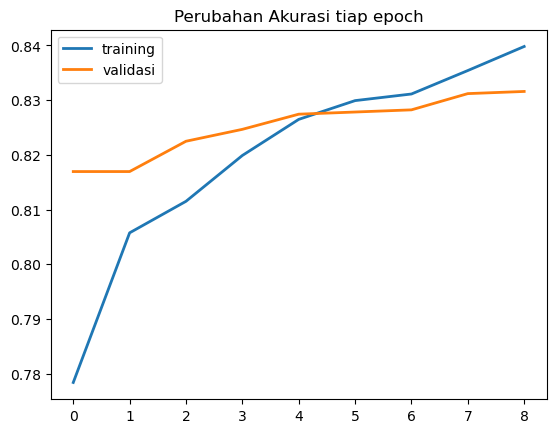

158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.862963  0.801912  0.831318      2615
           1   0.802516  0.863413  0.831851      2438

    accuracy                       0.831585      5053
   macro avg   0.832740  0.832662  0.831585      5053
weighted avg   0.833798  0.831585  0.831575      5053



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1             │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.7370 - loss: 0.5017 - val_accuracy: 0.8118 - val_loss: 0.3732
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8037 - loss: 0.3916 - val_accuracy: 0.8213 - val_loss: 0.3554
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.8148 - loss: 0.3750 - val_accuracy: 0.8276 - val_loss: 0.3532
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8265 - loss: 0.3570 - val_accuracy: 0.8284 - val_loss: 0.3535
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8284 - loss: 0.3508 - val_accuracy: 0.8290 - val_loss: 0.3491
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8356 - loss: 0.3404 - val_accuracy: 0.8292 - val_loss: 0.3506
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8343 - loss: 0.3400 - val_accuracy: 0.8344 - val_loss: 0.3493
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8

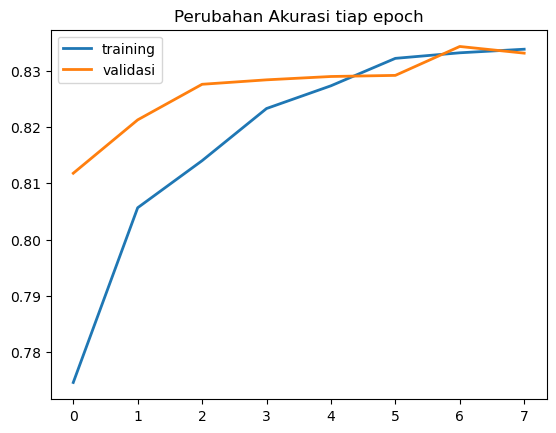

158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.851030  0.821415  0.835960      2615
           1   0.815342  0.845775  0.830280      2438

    accuracy                       0.833168      5053
   macro avg   0.833186  0.833595  0.833120      5053
weighted avg   0.833811  0.833168  0.833220      5053



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2             │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7561 - loss: 0.4981 - val_accuracy: 0.8120 - val_loss: 0.3713
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8055 - loss: 0.3885 - val_accuracy: 0.8171 - val_loss: 0.3700
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8125 - loss: 0.3740 - val_accuracy: 0.8183 - val_loss: 0.3637
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8154 - loss: 0.3638 - val_accuracy: 0.8239 - val_loss: 0.3562
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8222 - loss: 0.3540 - val_accuracy: 0.8237 - val_loss: 0.3549
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8305 - loss: 0.3463 - val_accuracy: 0.8276 - val_loss: 0.3533
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8346 - loss: 0.3399 - val_accuracy: 0.8284 - val_loss: 0.3527
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8

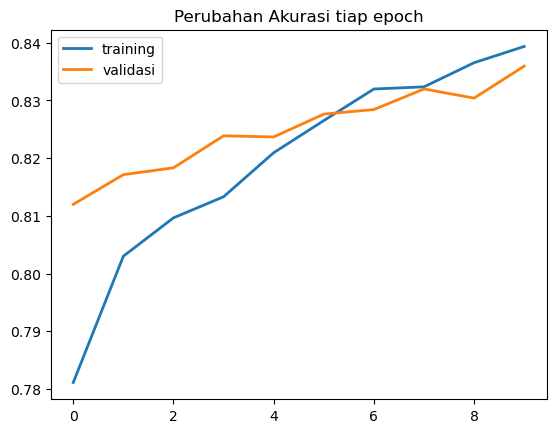

158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.853244  0.824857  0.838810      2615
           1   0.818614  0.847826  0.832964      2438

    accuracy                       0.835939      5053
   macro avg   0.835929  0.836341  0.835887      5053
weighted avg   0.836535  0.835939  0.835989      5053



In [13]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [14]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.8335642192756779
Average Precision : 0.8121573655437394
Average Recall    : 0.85233798195242
Average F1-Score  : 0.8316983976197959
